In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Data Source: https://data.boston.gov/dataset/rentsmart
# Desc: Rentals only; Boston; 2016-present (previous years available 'through 1700s')

# "RentSmart Boston compiles data from BOS:311 and the City's Inspectional Services Division
# to give prospective tenants a more complete picture of the homes and apartments they are 
# considering renting, assisting them in understanding any previous issues with the property, 
# including: housing violations, building violations, enforcement violations, housing complaints,
# sanitation requests, and/or civic maintenance requests."

In [5]:
'''
TODO
- correlations in space, time, building characteristics with complaint number and frequency

'''

'\nTODO\n- correlations in space, time, building characteristics with complaint number and frequency\n\n'

In [6]:
df = pd.read_csv('rentsmart_2016-Present.csv', parse_dates=['date'], dtype={'zip_code':str})

In [7]:
df.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2022-03-31 21:20:40.037,Sanitation Requests,Rodent Activity,"10 Albright St, 02132",West Roxbury,02132,2008027000,KELLEY MICHAEL M,1930.0,NaN,Residential 1-family,42.28711,-71.16710
1,2022-03-31 20:30:00.000,Housing Complaints,Electrical,"15 Ridgeview Ave, 02126",Mattapan,02126,1800114017,WILKINS FRANCINE,1945.0,NaN,Residential 2-family,42.27183,-71.08549
2,2022-03-31 20:20:43.470,Sanitation Requests,Abandoned Vehicles,"35 Firth Rd # 1, 02131",Roslindale,02131,1903173000,RIGAS IRENE M,1915.0,NaN,Residential 2-family,42.28753,-71.12429
3,2022-03-31 20:20:09.950,Sanitation Requests,Abandoned Vehicles,"33 Firth Rd # 1, 02131",Roslindale,02131,1903172000,HOANG LUC TS,1915.0,2005.0,Residential 2-family,42.28760,-71.12440
4,2022-03-31 19:32:58.257,Housing Complaints,Pest Infestation - Residential,"65 Marion St, 02128",East Boston,02128,102652000,PALOMINO JUDITH,1880.0,1990.0,Residential 3-family,42.37866,-71.03782


In [8]:
print('List of Neighborhoods')
df.neighborhood.value_counts()

List of Neighborhoods


Dorchester       76008
Boston           59567
Roxbury          31928
South Boston     20962
Brighton         19325
East Boston      16875
Allston          15471
Mattapan         14733
Jamaica Plain    11759
Mission Hill     11533
Hyde Park        10129
Roslindale        8829
Charlestown       7027
West Roxbury      4600
Chestnut Hill       93
Name: neighborhood, dtype: int64

In [9]:
print('List of Zipcodes')
df.zip_code.value_counts()

List of Zipcodes


02124    26703
02127    20961
02125    19765
02135    19327
02118    17577
02128    16874
02121    15899
02134    15457
02126    14718
02119    14347
02116    14278
02122    13664
02130    11787
02114    11752
02120    11463
02113    10766
02136    10129
02115     9709
02131     8655
02129     7028
02215     5516
02132     4750
02109     3023
02108     2170
02111     1944
02110      230
02210      203
02467      120
02199       29
02445        2
Name: zip_code, dtype: int64

In [10]:
print('Columns with missing values:\n',df.columns[df.isna().any()])

Columns with missing values:
 Index(['description', 'neighborhood', 'year built', 'year remodeled'], dtype='object')


In [11]:
df.shape

(308846, 13)

In [12]:
print('Number of Unique Dataset\n Entries per Field')
df.nunique()


Number of Unique Dataset
 Entries per Field


date              98154
violation_type        6
description         227
address           76464
neighborhood         15
zip_code             30
parcel            50441
owner             45381
year built          224
year remodeled       91
property_type         7
latitude          67293
longitude         67309
dtype: int64

In [13]:
print('Mean Violations Per Address (Raw Entry):',df.groupby('address').date.count().mean(),'Stdev:',df.groupby('address').date.count().std())
df.groupby('address').date.count()

Mean Violations Per Address (Raw Entry): 4.039103368905629 Stdev: 7.631525573832486


address
0 Ping On St, 02111            1
1 A Acorn St, 02108            3
1 A Unity St, 02113            2
1 Abbotsford St, 02121         2
1 Acorn St, 02108              5
                              ..
9A-15 Walk Hill St, 02130      3
9B-9 Garden Court St, 02113    2
9R Salem St, 02129             1
9R Shepard St, 02135           2
9R Winship St #B, 02135        3
Name: date, Length: 76464, dtype: int64

In [14]:
print('Mean Violations Per Owner (Raw Entry):',df.groupby('owner').date.count().mean(),'Stdev:',df.groupby('owner').date.count().std())
df.groupby('owner').date.count()

Mean Violations Per Owner (Raw Entry): 6.805623498821093 Stdev: 17.103377642190768


owner
0NE-50 MAGNOLIA LLC               10
1  ARBORVITAES  LLC               15
1 ARBORVITAES LLC                  6
1 ARION STREET LLC                 5
1 ASPINWALL ROAD REALTY  TRUST     5
                                  ..
ZUREK ANDREW D GELLING             1
ZUROMSKIS CHRISTINE TS            30
ZUROMSKIS J MICHAEL TRST          36
ZVONAR ZORAN                       2
ZYTO AURORE                        1
Name: date, Length: 45381, dtype: int64

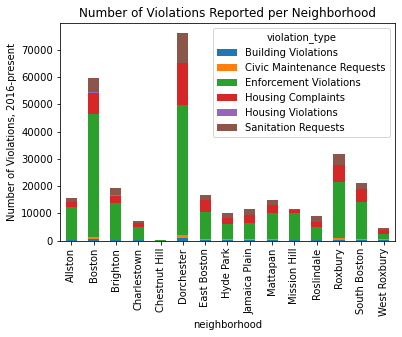

In [15]:
df.groupby('neighborhood').violation_type.value_counts().rename('num_violations_by_neighborhood').unstack().plot.bar(stacked=True)
plt.title('Number of Violations Reported per Neighborhood')
plt.ylabel('Number of Violations, 2016-present')
plt.show()

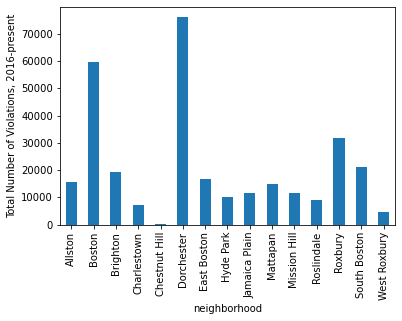

In [16]:
df.groupby('neighborhood').violation_type.count().plot.bar()
plt.ylabel('Total Number of Violations, 2016-present')
plt.show()

In [17]:
print('10 Enforcement Violations Descriptions\n with the Most Number of Reported Cases')
df.loc[df.violation_type == 'Enforcement Violations'].description.value_counts()

10 Enforcement Violations Descriptions
 with the Most Number of Reported Cases


Improper storage trash: res       139189
Overfilling of barrel/dumpster     20455
Overgrown Weeds On Property        14464
Failure clear sidewalk - snow      11642
Illegal dumping < 1 cubic yd        4999
Improper storage trash: com         4192
Occupying City prop wo permit       2510
illegal parking prop owner 1        1669
Unregistered motor vehicles- 2      1228
illegal parking prop owner 2         914
Failure To Register                  828
Unregistered motor vehicles-1        703
Maint a dumpster wopermit            644
Trash illegally dump container       347
Removal snow private prop            302
Failure clear sidewalk - snow:       207
Site Cleanliness license – WAR       186
Failure to secure a Re-Inspect       144
No Number On A Building              136
Failed Multiple Rental Insp          113
Failure to Obtain Inspection         110
Shopping Cart - 1                    103
Illegal dumping 1-5 cubic yd.:       100
Graffiti on building- 1               93
Failure clean si

In [18]:
print('10 Housing Complaints Descriptions\n with the Most Number of Reported Cases')
df.loc[df.violation_type == 'Housing Complaints'].description.value_counts()

10 Housing Complaints Descriptions
 with the Most Number of Reported Cases


Unsatisfactory Living Conditions                   9301
Work w/out Permit                                  6267
Contractors Complaint                              5262
Building Inspection Request                        4155
Pest Infestation - Residential                     3837
Heat - Excessive, Insufficient                     3704
Unsafe Dangerous Conditions                        3540
Working Beyond Hours                               2804
Electrical                                         1941
Protection of Adjoining Property                   1549
Mice Infestation - Residential                     1475
Maintenance - Homeowner                            1277
Maintenance Complaint - Residential                1119
Exceeding Terms of Permit                          1111
Chronic Dampness/Mold                               992
Cross Metering - Sub-Metering                       957
Illegal Occupancy                                   952
Illegal Rooming House                           

In [19]:
print('Mean Housing Complaints Per Owner (Raw Entry):',
      df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].mean(),
      'Stdev:',df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].std(),
     'Max:', df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].max())
df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints']

Mean Housing Complaints Per Owner (Raw Entry): 2.9500675465031696 Stdev: 5.642584876632863 Max: 383.0


owner
0NE-50 MAGNOLIA LLC               6.0
1  ARBORVITAES  LLC               1.0
1 ARBORVITAES LLC                 3.0
1 ARION STREET LLC                1.0
1 ASPINWALL ROAD REALTY  TRUST    2.0
                                 ... 
ZUREK ANDREW D GELLING            1.0
ZUROMSKIS CHRISTINE TS            4.0
ZUROMSKIS J MICHAEL TRST          1.0
ZVONAR ZORAN                      NaN
ZYTO AURORE                       NaN
Name: Housing Complaints, Length: 45381, dtype: float64

In [20]:
df.groupby('owner').violation_type.value_counts().rename('num_violations_by_owner').unstack()['Housing Complaints'].nlargest(20)
#uniue properties with reported complaints per owner per units

owner
GBM PORTFOLIO OWNER LLC                383.0
NORTHAMPTON SQ CONDO ASSOC             133.0
JPNDC  PITTS  LLC                      129.0
KASANOF LAND LLC                       121.0
CESCO LLC MASS LLC                     106.0
SOLSKINN PROPERTIES LLC                102.0
GEORGETOWNE HOMES ONE LLC MASS LLC      89.0
WASHINGTON COLUMBIA II MASS LPS         85.0
HARBOR POINT APTS CO LESSEE             83.0
MCKINLEY INVESTMENT GROUP  LLC          76.0
MERCANTILE WHARF ASSOCIATES             72.0
LACONCHA LIMITED PARTNERSHIP            71.0
PNC ARHPF BLUE MOUNTAIN APTS LLC        69.0
BISMARCK STREET OWNER LLC               67.0
NEW FRANKLIN PARK LIMITED               67.0
MILLER DWIGHT                           66.0
FERREIRA JOSE                           65.0
CHARLES RIVER PARK D COMPANY            64.0
GROVE HALL REDEVELOPER LLC MASS LLC     64.0
PNC ARHPF NEW PORT ANTONIO APTS LLC     64.0
Name: Housing Complaints, dtype: float64

In [21]:
df[df.owner == 'GBM PORTFOLIO OWNER LLC'].groupby('address').property_type.value_counts()

address                        property_type               
1 Howland St # 2B, 02121       Residential 7 or more units     1
1 Howland St #1, 02121         Residential 7 or more units     2
1 Howland St #11, 02121        Residential 7 or more units     1
1 Howland St #3, 02121         Residential 7 or more units     4
1 Howland St #6, 02121         Residential 7 or more units     2
                                                              ..
9 River Street Ter # 3, 02136  Residential 4 or more family    1
9 Ruggles St # 1, 02119        Residential 7 or more units     1
9 Ruggles St # 2, 02119        Residential 7 or more units     1
9 Ruggles St # 4, 02119        Residential 7 or more units     1
9 Ruggles St, 02119            Residential 7 or more units     3
Name: property_type, Length: 173, dtype: int64

In [22]:
df[df.owner == 'NORTHAMPTON SQ CONDO ASSOC'].groupby('address').property_type.value_counts().shape

(55,)

In [23]:
df.groupby('owner')['address'].count()

owner
0NE-50 MAGNOLIA LLC               10
1  ARBORVITAES  LLC               15
1 ARBORVITAES LLC                  6
1 ARION STREET LLC                 5
1 ASPINWALL ROAD REALTY  TRUST     5
                                  ..
ZUREK ANDREW D GELLING             1
ZUROMSKIS CHRISTINE TS            30
ZUROMSKIS J MICHAEL TRST          36
ZVONAR ZORAN                       2
ZYTO AURORE                        1
Name: address, Length: 45381, dtype: int64

In [24]:
df['property_type'].unique()

array(['Residential 1-family', 'Residential 2-family',
       'Residential 3-family', 'Residential 7 or more units',
       'Mixed Use (Res. and Comm.)', 'Condominium Main*',
       'Residential 4 or more family'], dtype=object)

In [25]:
df['property_type'].value_counts()

Residential 3-family            74172
Condominium Main*               58683
Residential 2-family            46983
Residential 1-family            41887
Residential 7 or more units     35337
Mixed Use (Res. and Comm.)      27422
Residential 4 or more family    24362
Name: property_type, dtype: int64

In [26]:
num_7prop_owned = df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').address.nunique()

In [27]:
prop7 = df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count()

In [28]:
prop7['num_prop'] = num_7prop_owned

In [29]:
df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count() / num_7prop_owned

owner
0NE-50 MAGNOLIA LLC           1.666667
10 SYDNEY STREET LLC          3.000000
10-18 BRAINERD ROAD LLC       2.333333
102 CHANDLER LLC             42.000000
106 WEBSTER LLC              15.000000
                               ...    
YIA YIA REALTY LP MASS LP     4.000000
YOUNG JACOB F III TS          2.400000
ZARBA CHRISTOPHER R           1.500000
ZEENA REALTY LLC              2.333333
ZOLA STEVEN J                18.000000
Length: 1364, dtype: float64

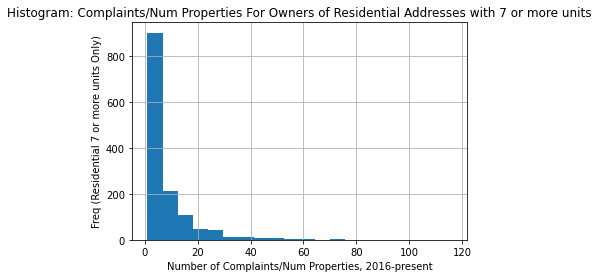

In [30]:

(df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count() / num_7prop_owned).hist(bins=20)
plt.xlabel('Number of Complaints/Num Properties, 2016-present')
plt.ylabel('Freq (Residential 7 or more units Only)')
plt.title('Histogram: Complaints/Num Properties For Owners of Residential Addresses with 7 or more units')
plt.show()

In [31]:
print('20 Owners of Residential Addresses with 7\n or More Units with Most Complaints per\n Properties Owned')
(df.loc[df.property_type == 'Residential 7 or more units'].groupby('owner').date.count() / num_7prop_owned).nlargest(20)
                                                                                                                 #GBM

20 Owners of Residential Addresses with 7
 or More Units with Most Complaints per
 Properties Owned


owner
NEW MASS AVE LLC                       116.000000
SHEPARD MONTROSE LLC                    83.000000
THREE-79 BEACON ST LIMITED              80.000000
FOUR FOUNTAIN PLACE LLC MASS LLC        75.500000
EMERALD REALTY CAPITAL LLC MASS LLC     74.000000
TWENTY 3 CORTES LLC MASS LLC            66.000000
VINAL MONTROSE LLC                      63.000000
FREEDMAN LILLIAN Z TS                   61.333333
148 W 9TH ST LLC                        55.000000
FERRIS TIMOTHY                          55.000000
233 BEACON STREET LLC                   54.000000
CASTING TANES                           54.000000
LADD MARTIN M JR TRSTS                  53.000000
FIVE-07 BEACON LLC MASS LLC             51.000000
FORTY ANDERSON STREET LLC               51.000000
R&R CAPITAL INVESTMENTS LLC             49.000000
FRANKLIN CAPITAL PARTNERS CO            48.000000
TORRINGTON WEBB LLC                     47.500000
ALUMNI ASSOC OF OMICRON                 47.000000
FAIRFIELD 10 LLC                        47.0

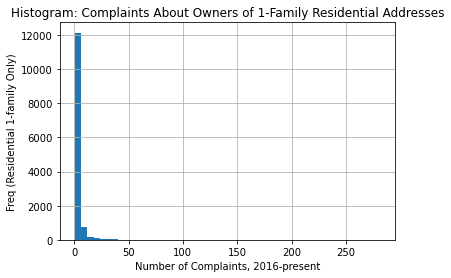

In [32]:
df.loc[df.property_type == 'Residential 1-family'].groupby('owner').date.count().hist(bins=50)
plt.xlabel('Number of Complaints, 2016-present')
plt.ylabel('Freq (Residential 1-family Only)')
plt.title('Histogram: Complaints About Owners of 1-Family Residential Addresses')
plt.show()

In [33]:
print('20 Owners of 1-Family Residential Addresses\n with Most Complaints')
df.loc[df.property_type == 'Residential 1-family'].groupby('owner').date.count().nlargest(20)
# 

20 Owners of 1-Family Residential Addresses
 with Most Complaints


owner
HARVEY VINA                       281
OCALLAGHAN TIMOTHY P TS           166
LIRIANO RICHARD                   158
MARTIN JAMES H III                150
CROWE CORA A                      139
WHITCHER FORREST D                138
WHITEACRE PROPERTIES LLC          127
SCANZIO MARK E                    125
KENNEY REALTY 2 LLC               106
CHANG DEREK T                     102
MCKINLEY INVESTMENT GROUP  LLC     96
BLUE PINE TREE LLC                 85
DIETRICH XAVIER J II               84
PRICE HERBERT C                    83
PATILLO DELORES                    81
HAMILTON FRANCIS                   78
FALCUCCI PROPERTIES LLC            72
CAMPBELL TREVON                    69
HODGE WILLIAM                      67
CHANG DEREK                        62
Name: date, dtype: int64

In [34]:
df.loc[df.owner.str.contains('GBM PORTFOLIO OWNER LLC') & (df.violation_type == 'Housing Complaints')]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
1530,2022-03-18 08:30:00.000,Housing Complaints,Chronic Dampness/Mold,"498 Norfolk St #202, 02126",Mattapan,02126,1800830000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.27933,-71.08883
2025,2022-03-15 09:32:00.000,Housing Complaints,"Unsatisfactory Utilities - Electrical, Plumbing","430 River St #31, 02126",Mattapan,02126,1800014000,GBM PORTFOLIO OWNER LLC,1940.0,1975.0,Residential 7 or more units,42.26908,-71.09103
4040,2022-03-01 13:26:00.000,Housing Complaints,"Heat - Excessive, Insufficient","85 Tennis Rd #302, 02126",Mattapan,02126,1803081000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Mixed Use (Res. and Comm.),42.27711,-71.09694
4618,2022-02-27 16:22:00.000,Housing Complaints,"Heat - Excessive, Insufficient","15 Ruggles St # 3, 02119",Roxbury,02119,902452000,GBM PORTFOLIO OWNER LLC,1899.0,2015.0,Residential 7 or more units,42.33162,-71.08321
5097,2022-02-24 15:22:00.000,Housing Complaints,Maintenance Complaint - Residential,"1 Rosa St # 103, 02136",Hyde Park,02136,1807006000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.26162,-71.11198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308664,2017-04-28 11:11:36.797,Housing Complaints,Unsatisfactory Living Conditions,"720 River St, 02126",Mattapan,02126,1801337002,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.26341,-71.10223
308675,2017-04-28 10:22:00.000,Housing Complaints,Cross Metering - Sub-Metering,"1037 River St #6, 02136",Hyde Park,02136,1808175000,GBM PORTFOLIO OWNER LLC,1970.0,1980.0,Residential 7 or more units,42.25989,-71.11716
308701,2017-04-28 06:57:00.000,Housing Complaints,Electrical,"80 Hiawatha Rd, 02126",Mattapan,02126,1803109001,GBM PORTFOLIO OWNER LLC,1965.0,1985.0,Residential 7 or more units,42.27764,-71.09706
308702,2017-04-28 06:53:00.000,Housing Complaints,Maintenance Complaint - Residential,"80 Hiawatha Rd, 02126",Mattapan,02126,1803109001,GBM PORTFOLIO OWNER LLC,1965.0,1985.0,Residential 7 or more units,42.27764,-71.09706


In [35]:
violations_byproptype_byowner = df.groupby(['owner','property_type']).date.count().unstack()
violations_byproptype_byowner

property_type,Condominium Main*,Mixed Use (Res. and Comm.),Residential 1-family,Residential 2-family,Residential 3-family,Residential 4 or more family,Residential 7 or more units
owner,,,,,,,
0NE-50 MAGNOLIA LLC,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1 ARBORVITAES LLC,NaN,NaN,NaN,NaN,15.0,NaN,NaN
1 ARBORVITAES LLC,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1 ARION STREET LLC,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1 ASPINWALL ROAD REALTY TRUST,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...
ZUREK ANDREW D GELLING,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ZUROMSKIS CHRISTINE TS,NaN,NaN,NaN,NaN,NaN,30.0,NaN
ZUROMSKIS J MICHAEL TRST,NaN,36.0,NaN,NaN,NaN,NaN,NaN


In [36]:
violations_byproptype_byowner.describe()

property_type,Condominium Main*,Mixed Use (Res. and Comm.),Residential 1-family,Residential 2-family,Residential 3-family,Residential 4 or more family,Residential 7 or more units
count,7734.000000,1798.000000,13311.000000,10814.000000,10002.000000,2015.000000,1364.000000
mean,7.587665,15.251390,3.146796,4.344646,7.415717,12.090323,25.906891
std,12.452761,22.585673,6.384283,7.523867,12.537585,14.886788,61.714470
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,6.000000
50%,4.000000,8.000000,2.000000,2.000000,4.000000,7.000000,14.000000
75%,8.000000,17.000000,3.000000,5.000000,8.000000,15.000000,29.000000
max,360.000000,247.000000,281.000000,246.000000,314.000000,161.000000,1902.000000


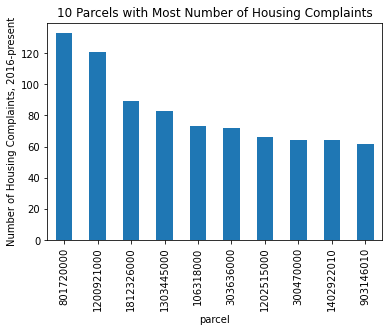

In [37]:
# Is there association of building characteristics,geography and loc with num housing complaints (next, type of housing complaints)
#next add month

df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().nlargest(10).plot.bar()
plt.title('10 Parcels with Most Number of Housing Complaints')
plt.ylabel('Number of Housing Complaints, 2016-present')
plt.show()

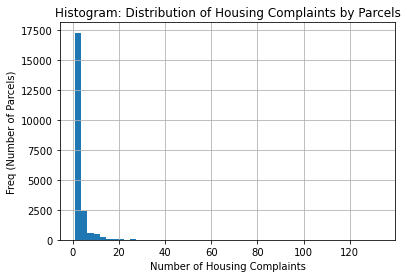

In [38]:
df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().hist(bins=50)
plt.title('Histogram: Distribution of Housing Complaints by Parcels')
plt.xlabel('Number of Housing Complaints')
plt.ylabel('Freq (Number of Parcels)')
plt.show()

In [39]:
print('10 Parcels with the Most Housing Complaints')
df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().nlargest(10)

10 Parcels with the Most Housing Complaints


parcel
801720000     133
1200921000    121
1812326000     89
1303445000     83
106318000      73
303636000      72
1202515000     66
300470000      64
1402922010     64
903146010      62
Name: violation_type, dtype: int64

In [40]:
# Don't have data on total number of properties of different property types, only those of at least one complaint
# df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('property_type').violation_type.count().plot.bar()
# plt.title('Number of Housing Complaints By Property Type')
# plt.ylabel('Number of Housing Complaints, 2016-present')
# plt.show()

In [41]:
worst_parcels = set(list(df.loc[df.violation_type == 'Housing Complaints',['violation_type','description','address','neighborhood','zip_code','parcel','owner','property_type']].groupby('parcel').violation_type.count().nlargest(10).index))


In [42]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].owner.value_counts()

NORTHAMPTON SQ CONDO ASSOC             133
KASANOF LAND LLC                       121
GEORGETOWNE HOMES ONE LLC MASS LLC      89
HARBOR POINT APTS CO LESSEE             83
MCKINLEY INVESTMENT GROUP  LLC          73
MERCANTILE WHARF ASSOCIATES             72
MILLER DWIGHT                           66
CHARLES RIVER PARK D COMPANY            64
TALBOT BERNARD HOUSING LLC MASS LLC     64
DARTMOUTH HOTEL LP                      62
Name: owner, dtype: int64

In [43]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].description.value_counts()

Unsatisfactory Living Conditions                   229
Heat - Excessive, Insufficient                      81
Contractors Complaint                               57
Pest Infestation - Residential                      52
Chronic Dampness/Mold                               46
Mice Infestation - Residential                      39
Building Inspection Request                         33
No Utilities Residential - Water                    33
Unsafe Dangerous Conditions                         32
Bed Bugs                                            30
Maintenance Complaint - Residential                 30
Unsatisfactory Utilities - Electrical, Plumbing     25
Working Beyond Hours                                25
Maintenance - Homeowner                             23
Electrical                                          14
Work w/out Permit                                   12
Exceeding Terms of Permit                           10
Poor Ventilation                                     9
Egress    

In [44]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].neighborhood.value_counts()

Roxbury        316
Dorchester     213
Boston         136
Hyde Park       89
East Boston     73
Name: neighborhood, dtype: int64

In [45]:
df.loc[(df.violation_type == 'Housing Complaints') & (df.parcel.isin(worst_parcels)) ].property_type.value_counts()

Mixed Use (Res. and Comm.)     491
Condominium Main*              133
Residential 1-family            73
Residential 3-family            66
Residential 7 or more units     64
Name: property_type, dtype: int64

In [46]:
df.loc[df.owner.str.contains('ARBORVITAES')].owner

32777     1  ARBORVITAES  LLC
33456     1  ARBORVITAES  LLC
48191     1  ARBORVITAES  LLC
59741       1 ARBORVITAES LLC
61262       1 ARBORVITAES LLC
61877       1 ARBORVITAES LLC
65569     1  ARBORVITAES  LLC
65571     1  ARBORVITAES  LLC
66009     1  ARBORVITAES  LLC
70307     1  ARBORVITAES  LLC
70308     1  ARBORVITAES  LLC
107439    1  ARBORVITAES  LLC
111054    1  ARBORVITAES  LLC
117474    1  ARBORVITAES  LLC
118126    1  ARBORVITAES  LLC
131169    1  ARBORVITAES  LLC
210294    1  ARBORVITAES  LLC
254524    1  ARBORVITAES  LLC
264755      1 ARBORVITAES LLC
268179      1 ARBORVITAES LLC
269484      1 ARBORVITAES LLC
Name: owner, dtype: object

In [47]:
vocab = set([tok for sent in df.owner.unique() for tok in sent.split()])

In [48]:
# vocab

In [49]:
#combined_df = mort_df.merge(poll_df, on = 'County_State')